# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [31]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print(data.shape)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

(440, 6)
Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [32]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [33]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100,200,300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


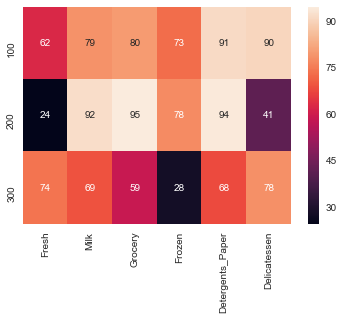

In [34]:
import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Sample 1 (Cutomer index 100):

The customer has average send on Fresh food, above average spend on Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen.  

This customer needs a one-stop shop that can supply all the categories.  A supermarket is a good target establishment for this customer to get a good balance of variety and choice for all the categories. (This customer can also consider splitting between a wholesale retalier and supermarket  for drawing price efficiencies, although most of the needs will be met by a supermarket.  Some needs such as Milk, and Detergents_papaerare likely more cost effective in bulk from a wholesale retalier.)

Establishmet:  Wholesale Retailer

Sample 2 (Cutomer index 200):

This customer's spend is very low relative to average on Fresh food and Delicatessen while having above average spend on Milk, Grocery, Frozen, Detergents_Paper.  

This customer has high needs for Detergetns_paper which is typically not cost effective by unit cos at supermarket.  

Considering all the needs, I suggest that the customer use a Wholsesale retailer as a primary, and a supermarket for supplementing other needs.

Establishment: Wholesale Retailer

Sample 3 (Customer Index 300):

This customer's spend is above average on Fresh foods, Milk, and Delicatessen while the spend is below average on Grocery, Frzen, and detergents_Paper. 

Because Fresh foods, Milk, and Delicatessen are typically available at a supermarket as well as Grocery on which the spend is close to average, this customer can leverage a supermarket for primary needs. 

Establishment: Supermarket

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [35]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# Import statement for train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

outcome = data['Milk']

new_data = data.drop(['Milk'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, outcome, test_size=0.25, random_state=42)


# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set

score = regressor.score(X_test, y_test)

print('Score - R^2 is: ', score)

Score - R^2 is:  0.156275395017


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* Which feature did you attempt to predict? 
 
 I attempted to predict the feature 'Milk' from the other remaining features.
 

* What was the reported prediction score? 
 
 The reported prediction score is 0.156.
 

* Is this feature necessary for identifying customers' spending habits?
 
 The R^2, the Coefficient of Determination for Milk is fairly low, 0.156, which indicates that very little of the feature is explained by the independent variables in the regression, in our case, the other remaining features (Fresh, Grocery, Frozen, Detergents_Paper, and Delicatessen).  Therefore, this feature, Milk, is necesary for identifying the customers' spending habits.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/sirrinki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


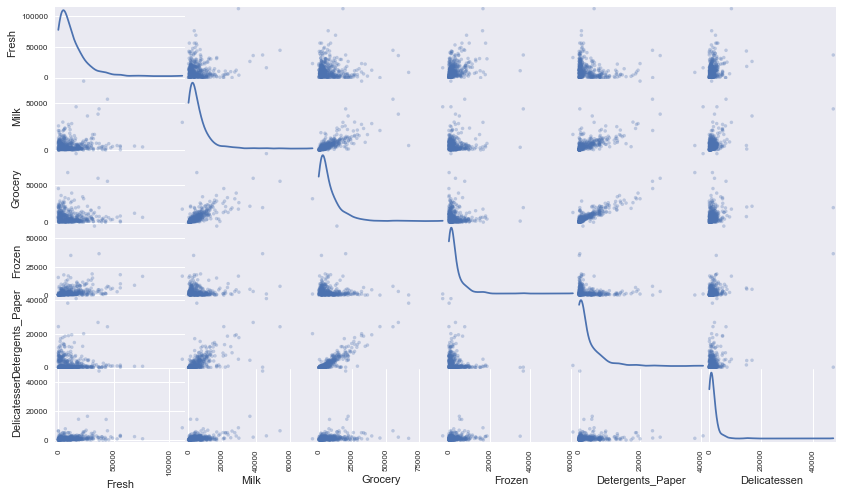

In [36]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


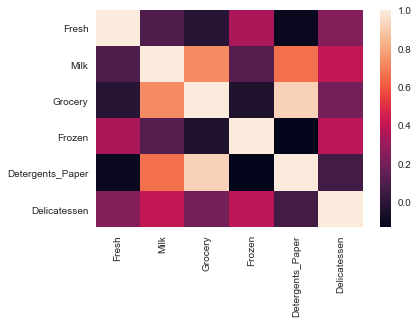

In [37]:
sns.set()

correlations = data.corr()
print(correlations)
sns.heatmap(correlations)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

Normality:


Each of the features have a lower limit of zero for the amount of spending.  When the spending amount is plotted as a histogram for each of the fatures, the bell curve is not symmetric and is skewed to the right with the mean spend tending closer to the lower end of zero and with customers spending a large amounts for each of the categories, resulting in longer right tail and the distribution skewed to the right.
  

Outliers:

We can notice that there are a few outliers where the customers spend is largely disproprotionate from the rest of the customers in certain categories. 

We notice that in the following categories:
  
  Fresh, one customer spend over 100,000
  Milk, there are two cusotmers that spend between 40,000 and 60,000
  Grocery, there is one customer that spends close to 90,000
  Frozen, there is one customer that spends close to 60,000
  Detergent_paper, there are two customers that spend close to 40,000
  Delicatessen, there is one customer that spends close to 50,000
  
Outliers skew the parameters of the distribution by distorting the mean, and standard deviation of the distribution.  This distortion can mislead the decision makers to make a choice that is broadly more expensive with lower return when implemented.

Large Number of Datapoints Near 0:

 We notice that the peaks of the bell cureve in each of the category is close to zero. This implies that there is no one category that is used predominately by all customers, but have preferences that cater to needs across the categories.
 
 
Are there any pairs of features which exhibit some degree of correlation?


 We can notice from the correlation matrix that the following pairs have correlation over 0.5.
 
  Milk, Grocery (0.72);
  Milk, Detergets_paper (0.66);
  Grocery, Detergents_paper (0.92)
  
  We can also notice the higher correlation relationship in the scapper matrix plot where there is a degree of linearity in the plot.
  
  Very high correlation of Grocery and Detergets_paper indicates that potential shopping habit of households making both purchases during the same visit to the establishments.
 
 That Grocery and Detergets_paper are highly very correlated implies that they are redundant in the informaton that can both provide together, but each one of them by themselves provide relevent information. 
 
 That milk is rather mildly yet significantly correlated to Grocery and Detergents_paper further corroborates that Milk is a relevant feature that cannot be explained away fully without loss of significant information from other features.
 
 

Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?

  Milk is central indicator of two other categories (Grocery and Detergents_paper) shown by high correlation.  While it is possible that Grocery and Detergents_paper explain Milk purchase spend, considering all features, Milk spend does not appear to be fully explained by all the features.  

How is the data for those features distributed?

 Milk and Grocery are independently normally distributed.  We notice that most of the customers spend less than 20,000 on Milk and Grocery.  There is an outlier in of the categories.
 
 Milk and Detergets_paper are each normally distributed. The spend in each category is mostly dense within 20,000.  Milk has one outlier and so does Detergets_paper.
 
 Grocery and Detergents_paper is highly correlated and normally distributed. Most of the spend is concentrated within 20,000 for Grocery as well as for Detergents_paper.
 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Users/sirrinki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


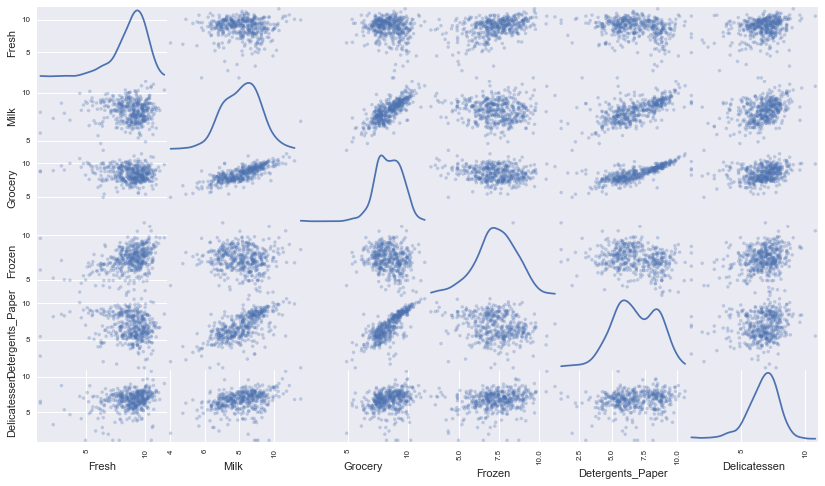

In [38]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000 -0.019834 -0.132713  0.383996         -0.155871   
Milk             -0.019834  1.000000  0.758851 -0.055316          0.677942   
Grocery          -0.132713  0.758851  1.000000 -0.164524          0.796398   
Frozen            0.383996 -0.055316 -0.164524  1.000000         -0.211576   
Detergents_Paper -0.155871  0.677942  0.796398 -0.211576          1.000000   
Delicatessen      0.255186  0.337833  0.235728  0.254718          0.166735   

                  Delicatessen  
Fresh                 0.255186  
Milk                  0.337833  
Grocery               0.235728  
Frozen                0.254718  
Detergents_Paper      0.166735  
Delicatessen          1.000000  


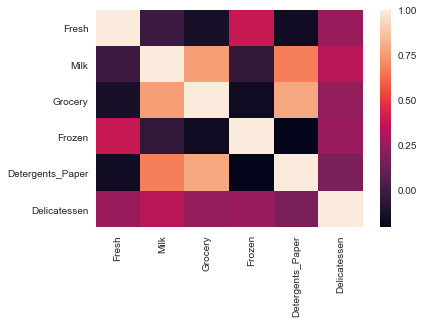

In [39]:


correlations_log = log_data.corr()
print(correlations_log)
sns.heatmap(correlations_log)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

  Milk, Grocery (0.76);
  Milk, Detergets_paper (0.68);
  Grocery, Detergents_paper (0.79)

In [40]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [42]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
   
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Are there any data points considered outliers for more than one feature based on the definition above? 
 
  Yes, points 65, 66, 75, 128, and 154 are outliners because they appear in more than one feature (category) and can skew the analysis because of extreme spending by these customers.
  
  
* Should these data points be removed from the dataset? 
  
  If this is a not a normal spending pattern but something that had to be done in response to an event such as an emergency or a special occasion such as a wedding that's not routine, then, they can be removed.  If this is a normal spening pattern that repeats over the internval in a time series, then this data should be factored in or treated separately in a different analysis so that the consolidated analysis will influence any decisions and actions. Outliers can adversely effect k-means cluster detection.  The assign step and the following optimize step is influenced by the the distance between the points and the cluster centers.  So, having an unjustified outlier can influence the final cluster center outcomes. 
  

* If any data points were added to the `outliers` list to be removed, explain why.
 
  Because these cusotmers outspend others with disproportionate amounts in more than one feature (category) that can skew the analysis of segmenting the customers by thier purchasing habits, they are added to the 'outliers' list to be removed.
 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

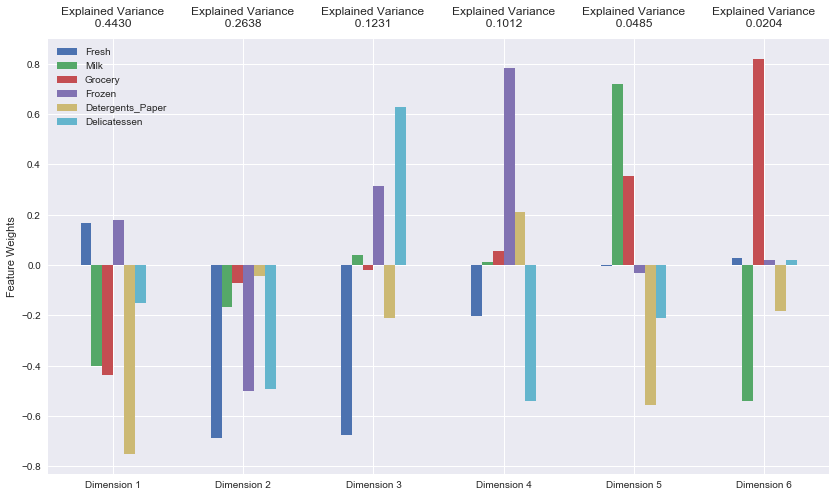

In [43]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features

from sklearn.decomposition import PCA
pca = PCA(n_components = 6)

pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [44]:
print(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


**Answer:**


How much variance in the data is explained in total by the first and second principal component?

    The first two principal components explain: 0.4424 + 0.2766 = 0.719, i.e 71.9% of the variance. ( Dimension 2    0.7068)

How much variance in the data is explained by the first four principal components?

    The first four principal components explain:  0.4424 + 0.2766 + 0.1162 + 0.0962 = 0.9314, i.e 93.14% of the variance.
    
Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending. (Dimension 4    0.9311)

    The first principal component, Dimension 1, captures the highest variance by definition, in that the loss of information from the original data points when projected on the first principal component is the minimum information loss.  The second principal component, Dimension 2, captures the second highest variation (second least loss of information), and so on in decreasing order of variance(and increasing order of information from the original data set).
    
    Dimension 1:
    
    The inflence of Detergents_paper at a weight of -0.75 is highest and influences the negative variance of the dimension.  This feature is followed by Grocery and Milk.  Fresh and Frozen categories influence the dimension to a lesser degree for postive variance.  
    
    This dimension represents customers that spend mostly on household items that can be found at an establishment such as supermarket 
    
    Dimension 2:
    
    It can be noticed that all the featues  negatively influence the variance with this dimension.  Categories Fresh, Frozen, and Delicatessen influene the dimension more than Milk, Grocery, and Detergents_paper.  

    This dimension is trying to distinguish customers who are in a rush and want quick meal who frequent the deli sections of the supermarkets from more traiditional family needs focused customers.
    
    
    Dimension 3:
    
    As we can notice, the contribution of variance in this dimension is lesser at 0.1162, which indicates that the customers are less differentiated by this dimenstion alone.  We notice that that there is large +ve weight for delicatessen and large -ve weight for Fresh.  So, this dimension is trying to separate customers that are high on these categories for most part.  
    
    Dimension 4:
    
    The variance is 0.0962, which is much lower and is likely not that significant in grouping the customer segments.  
    
    It's primarily influences Frozen food spenders (+ve variance) and tries to separate them from Delicatessen and Fresh (-ve variance)
    
    Dimension 5:
    
    The variance is 0.0458, which implies that the information loss for this dimension is high.   Milk higly influences the postive variance while Detergent_paper influences negative variance.  This dimension attempts to differentiate customers that are high spenders in Milk from those that are high spenders with Detergents_paper.
       
    
    Dimension 6:
    
    The variance is 0.0229.  Which implies that variation is very low in this dimension the csutomers are very close in this dimension.  This dimension is hightly influenced by Grocery for -ve variance and by Milk for +ve variance. We also observe high correlation between Grocery and Milk and it's hard to differentiate those customers that by Milk or Grocery because they tend to make purchases together.
    
    





### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [45]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3579,-1.7393,0.2210,0.2840,-0.5939,-0.0148
1,-2.9903,-0.3645,0.2521,1.5653,0.1922,0.1244
2,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [46]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [47]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.3579,-1.7393
1,-2.9903,-0.3645
2,-1.2804,-0.9587


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

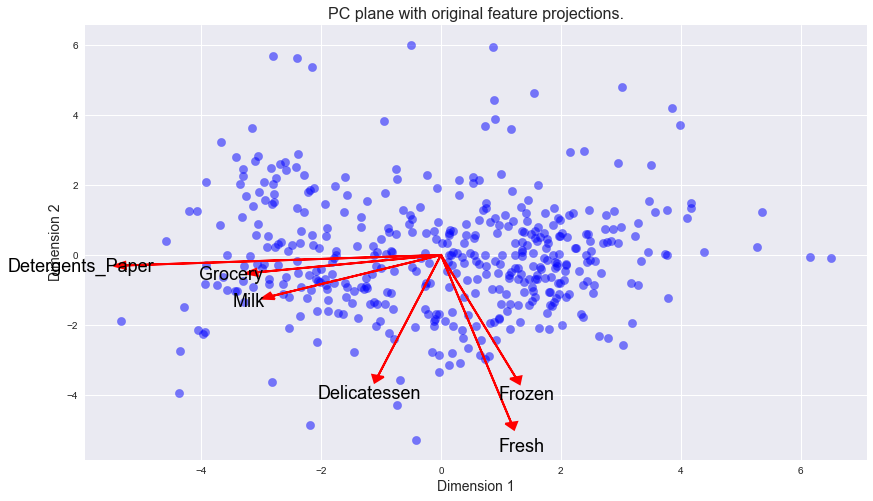

In [48]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

What are the advantages to using a K-Means clustering algorithm?

 * K-means clustering is easy to implement and when there are large number of clusters K-means is computationally effective.
 * K-means produces clusters that are tight with membership.
 * It's relatively easy to interprest the clustering results.

What are the advantages to using a Gaussian Mixture Model clustering algorithm?
  
 * Gaussian Mixture Model (GMM) allows for soft clustering, so we can sample memberships for multiple clustering.
 * It provides flexibility in shapes of other clusters.


Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

  I prefer to use the Gaussian Mixture Model because each of the features are normally distributed (shown by scatter plot for log_data) and the number of data samples is not extensively computational intensive.  So, I prefer GMM over K-means clustering.
  
  




### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [53]:
# TODO: Apply your clustering algorithm of choice to the reduced data 

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=2)

# TODO: Predict the cluster for each data point

preds = clusterer.fit(reduced_data)

# TODO: Find the cluster centers
centers = preds.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = preds.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds.predict(reduced_data))

print(score)

0.422324682646


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
 
* Of these, which number of clusters has the best silhouette score?

**Answer:**


    * Report the silhouette score for several cluster numbers you tried.
    
    The following pairs of (n_components, silhouette_score) represent different combinations for the attempted n_components.
    
    (2, 0.422324682646)
    (3, 0.404248738241)
    (4, 0.357189629606)
    (5, 0.24606593657)
    

    * Of these, which number of clusters has the best silhouette score?
    
    Of the attempted clusters, n_components = 2, has the best silhouette score.  The socre for individual data sample ranges from -1 to +1, with +1 being the best indication for the data point membership to a given cluster.  So, higher the silhouette_score, the better the clusters formation.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

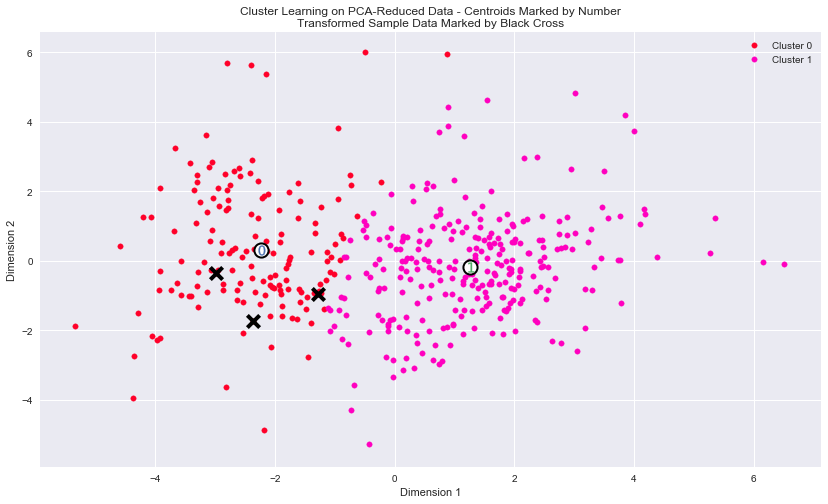

In [54]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds.predict(reduced_data), centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [58]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3567.0,7860.0,12249.0,873.0,4713.0,966.0
Segment 1,8939.0,2108.0,2758.0,2073.0,352.0,730.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**


Segment1, which represents Cluster 1, has below average spend on  all features, Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen.  

This indicates that this segment has low needs for home made foods and and has minimal household expenditures.  The segemnt represents customers that prefer to eat out predominately or are likely single. The establishment can either be restaurant (for those who prefer to eat out) or a supermaket where all the items can be suitably justified considering that a supermaket is likely much closer to drive than a wholesale reatieler, for those who are likely single and make home made food. 

Establishment:  Supermarket.

Segement0, which represents Cluster 0, the first cluster has above average spend on feature Milk, Grocery, Detergent_paper. The segment has below average spend on Fresh, Frozen, and Delicatessen.  

Considering the high needs for Grocery which is significantly higher than average Grocery spend, 12,449.0 vs 7951.28, The segment also has high need for Detergents_pager, we can represent the segment as Wholesale Retailer.

Establishment: Wholesale Retailer.









### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [64]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

Sample 1, there is a match between the predicted establishment of Wholesale Retailer with Segment 0, which represents Wholesale Retailer. This can be attributed to high similaries in spending habits that are highly cost effective at a wholesale retailer such as Milk, Grocery in bulk, and Detergetn_paper in bulk.

Sample 2, there is match betwen the predicted establishmen tof Wholesale Retailer with Segment 0, which represents Wholesale Retailer.  The high above average needs for Milk, Grocery, and Detergents_paper justify the establishment of a Wholesale Retailer both fromt the prediction and from the generated Segment 0, which can represent Wholesale Retalier to meet the above spending needs for Milk, Grocery, and Detergent_paper.

Sample 3, there is not a match between predicted establishment and segment 0, which can be Wholesale retailer.  Although the average spend on each of the features in segment 1 is generally less than that for customer that represents sample 3, for the generally low spend on the features categories, an establishment of Supermarket can be justified. I feel that segment 1 is a better choice for Sample 3.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

    The changes will affect customers that are less reliant on bulk purchase for one or more feature categories because if the  spend on each of the categories is low, the customer may be indifferent to purchase the products from an alternative establishment type, even though relative cost for the low spend items may be marginally higher from an alternative establishment.  So if the customers have high spend in categories then it's unlikely that the customer will switch to a different establishment if changes in delivery schedule is put in affect.  So, memebrs of Cluster 0 who are more likely to purchase in bulk from Wholesale Retailer.  I feel that a switch to 3 day delivery from 5 day delivery is going to be inconvenient to customers of both clusters, but, the members of Wholesale Retailer establishment will be less sensitive and tolerate the inconvenient to a higher degree than the customers of Supermarket establishment.


    The following procedure an be used to set up the A/B testing to verify the hypotheis.
    
    * Identify 5% of customers of Cluster 0, Wholesale Retailer (Test group 0)
    * Identify %% of customers of Cluster 1, Supermarket (Test group 1)
    * The remaiing 95% of the customers in each of the clusters will be the control group (assuming that all 100% of the customers are active)
    * Change delivery schedule of each of the test groups 0 and 1 to three days from five days
    * Perform the altered delivery schedule for the test groups over three weeks to capture most of the purchasing activity pattern (time period between two purchases) for the customers in the both the test groups.
    * Capture the customes' reaction to altered delivery schedule in both the test groups to verify if the usually purchasing customer in the time interval made or did not make a purchase.
    * Compare the results of test groups to those in the respective, representing control groups to see the comparison of effect of change in delivery schedule.    
    * It's also possible to repeat the experiment with a different set of test group in each of the clusters to reinforce the test results.  Care should be take that if there is an adverse effect, then for the second run 10% of the customers in the groups can be effected. So, I suggest a second test run contingent on the basis of the first test run, if there is no adverse effect on the customer test groups. It's also possible to validate the results of the first run in the second test run to the clusters that are not adversely affected.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

After attributing the corresponding segment to each of the customer, a supervised learning model such as Linear Regression or a Decison Tree Classifier can be used to train the labeled customers, with the label, Segment, given by the Gaussian Mixture cluster.  We can use the trained supervised model, apply the new customers spends for each of the  features to this model to predict the label, the segment for each of the new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

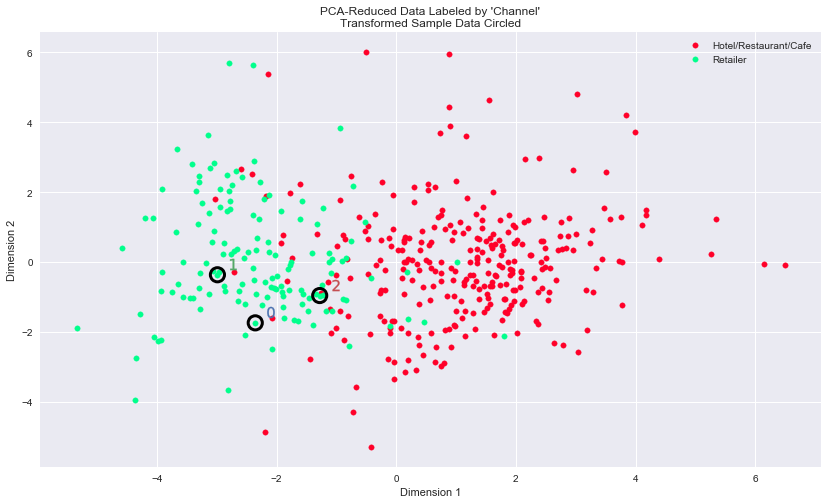

In [61]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The first two customer in the sample correspond  with the retail channel.  They are visually far to the left plotted by (-2.3579, -1.7393) and (-2.9903, -0.3645) and the corresponding cirlcles in the plot over green dots determine that they represent a retailer segment. 

The third customer represented by (-1.2804, -0.9587) is at the juncture of the two segemnts and likely a HoRaCa ( a complete red dot is within the circle represented by the customer in the plot). 

While I am confident on the basis of the spend the first two customer samples are predominately a retailer based customers, the third sample could either be a person who depends on home food or on HoRaCa on the basis of the low spend in most of the feature categories.

Yes, I do consider the classifications consistent, in that the first two samples' prediction for eastablishmnet was Wholesale Retailer, and the third sample was predicted to be supermakret or not home food eater (eats out).



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.